<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Classification/ML_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


# Plot settings

In [3]:
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 11
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['figure.figsize'] = 7,4
sns.set_style('ticks')

# Reading the data



In [4]:
# Importing the datasets
df  = pd.read_csv('emails.csv')
# y      = df.OSA.values
# x_data = df.drop(['OSA'], axis = 1)

# Display the data

In [5]:
df.shape

(5172, 3002)

**Data Visulatization**

In [6]:
# fig, (ax1, ax2,ax3) = plt.subplots(1,3)
# fig.suptitle('Data Statistics')
# ax1.plot(OSA, 'o-')
# ax1.set_ylabel('Damped oscillation')
# ax2.plot(x2, y2, '.-')
# ax2.set_xlabel('time (s)')
# ax2.set_ylabel('Undamped')
# plt.show()

# plt.subplot(13)
# # equivalent but more general
# ax1 = plt.subplot(2, 2, 1)
# # add a subplot with no frame
# ax2 = plt.subplot(222, frameon=False)
# # add a polar subplot
# plt.subplot(223, projection='polar')

# fig, axes = plt.subplots(1,3,figsize=(7,5),sharey=True)
# sns.countplot(ax=axes[0],data=df, x='Class')
# sns.countplot(ax=axes[1],data=df, x='gender')
# sns.countplot(ax=axes[2],data=df, x='retire')
# plt.savefig('Statistics.png')


# Drop unwanted data

In [7]:
# Drop the first column
df = df.drop('Email No.', axis = 1)

In [8]:
# Drop rows with any NaN values
df = df.dropna()

In [9]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Class
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df.sample(n = 10)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Class
4359,25,6,7,7,6,2,97,2,2,15,...,0,0,0,0,0,0,0,1,0,0
5037,3,4,2,1,1,0,23,2,0,2,...,0,0,0,0,0,0,0,0,0,0
3355,6,6,8,2,4,3,80,1,2,12,...,0,0,0,0,0,0,0,0,0,0
2857,0,0,1,0,1,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4730,9,11,3,2,6,2,123,21,1,29,...,0,0,0,0,0,0,0,0,0,0
193,5,0,1,2,2,0,12,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4664,5,1,1,2,0,3,39,3,0,9,...,0,0,0,0,0,0,0,2,0,1
3134,15,15,1,12,4,5,95,3,1,11,...,0,0,0,0,0,0,0,1,0,0
270,0,1,2,0,1,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2763,0,1,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1


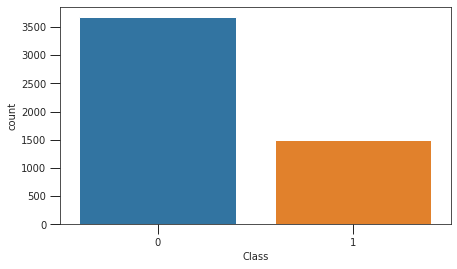

In [11]:
# Calculate the number of classes in the class
sns.countplot(data=df, x='Class')
plt.savefig('classes.png')

In [12]:
from sklearn.preprocessing import StandardScaler

x_data = df.drop('Class', axis = 1)
y_data = df['Class']

y_data.value_counts()

0    3672
1    1500
Name: Class, dtype: int64

<AxesSubplot:ylabel='Class'>

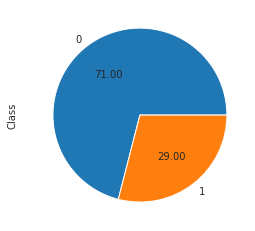

In [13]:
y_data.value_counts().plot.pie(autopct='%.2f')
# plt.savefig('classes.png')

In [14]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# The class can be used just like the RandomOverSampler class in the 
# previous section, except the strategies impact the majority class 
# instead of the minority class. For example, setting the sampling_strategy 
# argument to “majority” will undersample the majority class determined 
# by the class with the largest number of examples.

# define undersample strategy
undersample = RandomOverSampler(sampling_strategy='not majority')
x_over, y_over = undersample.fit_resample(x_data,y_data)

<AxesSubplot:ylabel='Class'>

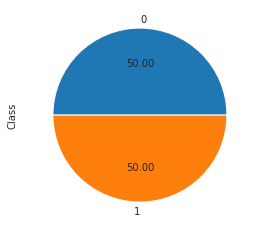

In [15]:
y_over.value_counts().plot.pie(autopct='%.2f')

In [16]:
x_over.shape

(7344, 3000)

In [17]:
sc = StandardScaler()
X  = sc.fit_transform(x_over)
Y  = y_over

In [18]:
X

array([[-0.53124038, -0.62501165, -0.27632979, ..., -0.05640416,
        -0.31466877, -0.07039471],
       [ 0.11654167,  0.65879025,  1.63151477, ..., -0.05640416,
        -0.02166415, -0.07039471],
       [-0.53124038, -0.62501165, -0.27632979, ..., -0.05640416,
        -0.31466877, -0.07039471],
       ...,
       [-0.53124038, -0.52625766, -0.27632979, ..., -0.05640416,
        -0.31466877, -0.07039471],
       [-0.53124038, -0.52625766, -0.27632979, ..., -0.05640416,
        -0.31466877, -0.07039471],
       [-0.28832211, -0.22999568, -0.27632979, ..., -0.05640416,
        -0.31466877, -0.07039471]])

## Correlation between different variables

In [19]:
# # Correlation heatmap with mask for upper traingle
# # Correlation between different variables
# corr = df.corr()
# # Set up the matplotlib plot configuration
# f, ax = plt.subplots(figsize=(10, 6))
# # Generate a mask for upper traingle
# mask = np.triu(np.ones_like(corr, dtype=bool))
# # Configure a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# # Draw the heatmap
# sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
# plt.savefig('Heatmap.png')


## Class distribution in Spam dataset

In [20]:
# fig, axs = plt.subplots(figsize=(10, 4), tight_layout=True)
# sns.boxplot(data=df)
# plt.show()

# sns.pairplot(df, vars=["age","income","tenure","Class"])
# plt.grid()
# plt.savefig('Correction with Class Satisfication.png')
# plt.show()

# Preparing data for machine learning

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [22]:
def calculate_confusion(name,y_train, y_pred_train, y_test, y_pred_test):
  
  # Making the Confusion Matrix
  # from sklearn.metrics import confusion_matrix
  # from sklearn.metrics import plot_confusion_matrix
  
  cm1   = confusion_matrix(y_train, y_pred_train)
  cm2  = confusion_matrix(y_test, y_pred_test)

  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy1  = (cm1[0,0] + cm1[1,1]) / (cm1[0,0] + cm1[0,1] + cm1[1,0] + cm1[1,1])
  precision1  = cm1[1,1] / (cm1[1,1] + cm1[0,1])
  recall1        = cm1[1,1] / (cm1[1,1] + cm1[1,0])

  print('Performance Criteria in Training Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy1)
  print ('precision %.3f' % precision1)
  print('recall %.3f' % recall1)

  #########################################
  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy2 = (cm2[0,0] + cm2[1,1]) / (cm2[0,0] + cm2[0,1] + cm2[1,0] + cm2[1,1])
  precision2 = cm2[1,1] / (cm2[1,1] + cm2[0,1])
  recall2       = cm2[1,1] / (cm2[1,1] + cm2[1,0])

  print('====================')
  print('Performance Criteria in Testing Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy2)
  print ('precision %.3f' % precision2)
  print('recall %.3f' % recall2)

  cm_train = pd.DataFrame(cm1, range(2), range(2))
  cm_test  = pd.DataFrame(cm2, range(2), range(2))

  f,(ax1,ax2) = plt.subplots(1,2,figsize=(7, 3), sharey=True)
  g1 = sns.heatmap(cm_train,cbar=False,ax=ax1,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g1.set_title('Training case',fontname= 'serif',fontsize=10, color='k')
  g2 = sns.heatmap(cm_test,cbar=False,ax=ax2,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g2.set_title('Testing case', fontname= 'serif',fontsize=10, color='k')
  f.suptitle(' Confusion matrix for '+name, fontsize=11)
  plt.savefig(name + ".png")
  plt.show()

In [23]:
# function for plotting learning curve
from sklearn.model_selection import learning_curve
import plotly.graph_objects as go
import numpy as np

def plot_learning_curves(estimator, X, y, cv):
    """
    Don't forget to change the scoring and plot labels
    based on the metric that you are using.
    """

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=estimator,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=cv,
        scoring="accuracy",
        random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean  = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=train_sizes,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=train_sizes,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="green"),
        )
    )

    fig.update_layout(
        title="Learning Curves",
        xaxis_title="Number of training examples",
        yaxis_title="Accuracy",
    )

    fig.show()
    # plt.show()   # Display

Performance Criteria in Training Case for LR
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for LR
Accuracy  0.974
precision 0.949
recall 1.000


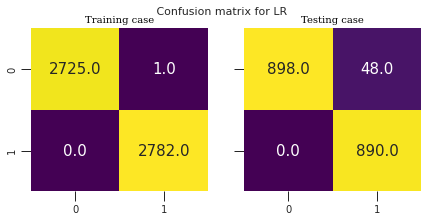

In [24]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# We now prepare our selected models
models  = []
results   = []
names   = []
scoring  = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=20)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_train, y_train)
results.append(cv_results)  

In [25]:
# Compute False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, lr.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_train,lr.predict(x_train))

Performance Criteria in Training Case for SVM
Accuracy  0.984
precision 0.970
recall 1.000
Performance Criteria in Testing Case for SVM
Accuracy  0.961
precision 0.931
recall 0.992


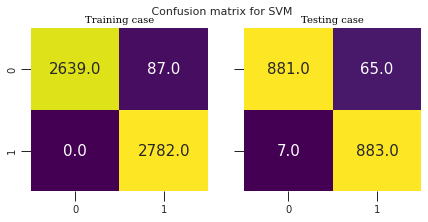

In [26]:
#SVM ####################################
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_train, y_train)
results.append(cv_results)

In [27]:
# Compute False postive rate, and True positive rate
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, svm.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc2 = metrics.roc_auc_score(y_train,svm.predict(x_train))

Performance Criteria in Training Case for GBC
Accuracy  0.979
precision 0.962
recall 0.997
Performance Criteria in Testing Case for GBC
Accuracy  0.965
precision 0.934
recall 0.999


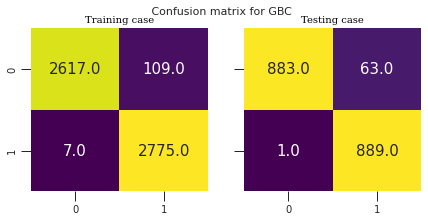

In [28]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)
calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_train, y_train)
results.append(cv_results)


In [29]:
# Compute False postive rate, and True positive rate
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, GBC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc3 = metrics.roc_auc_score(y_train,GBC.predict(x_train))

Performance Criteria in Training Case for GNB
Accuracy  0.966
precision 0.937
recall 1.000
Performance Criteria in Testing Case for GNB
Accuracy  0.952
precision 0.915
recall 0.993


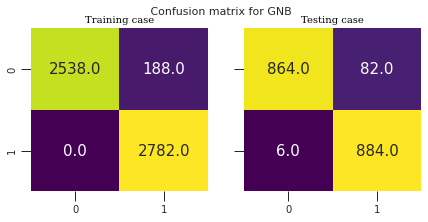

In [30]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred_train = GNB.predict(x_train)
y_pred_test  = GNB.predict(x_test)
calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_train, y_train)
results.append(cv_results)


In [31]:
# Compute False postive rate, and True positive rate
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_train, GNB.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc4 = metrics.roc_auc_score(y_train,GNB.predict(x_train))

Performance Criteria in Training Case for KNC
Accuracy  0.907
precision 0.848
recall 0.995
Performance Criteria in Testing Case for KNC
Accuracy  0.849
precision 0.764
recall 0.996


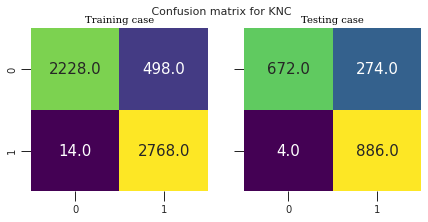

In [32]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_train, y_train)
results.append(cv_results)



In [33]:
# Compute False postive rate, and True positive rate
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, KNC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc5 = metrics.roc_auc_score(y_train,KNC.predict(x_train))

Performance Criteria in Training Case for DT
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for DT
Accuracy  0.957
precision 0.932
recall 0.983


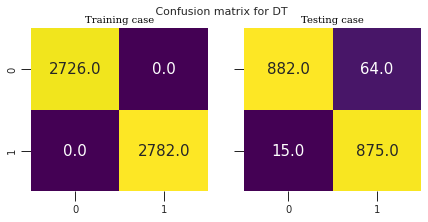

In [34]:
# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_train, y_train)
results.append(cv_results)


In [35]:
# Compute False postive rate, and True positive rate
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, DT.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc6 = metrics.roc_auc_score(y_train,DT.predict(x_train))

In [36]:
# import graphviz
# # DOT data
# dot_data = tree.export_graphviz(DT, out_file=None, filled=True)
# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph


Performance Criteria in Training Case for RFC
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for RFC
Accuracy  0.974
precision 0.950
recall 1.000


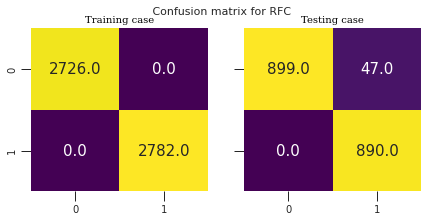

In [37]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_train, y_train)
results.append(cv_results)



In [38]:
# Compute False postive rate, and True positive rate
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_train, RFC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc7 = metrics.roc_auc_score(y_train,RFC.predict(x_train))

In [39]:
# plot_learning_curves(RFC, x_train, y_train, cv=5)

Performance Criteria in Training Case for ANN
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for ANN
Accuracy  0.978
precision 0.959
recall 0.997


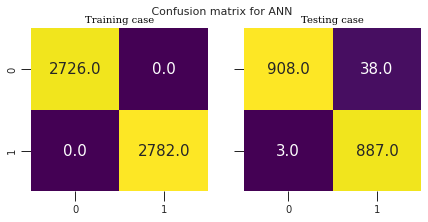

In [40]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', max_iter= 500, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_train, y_train)
results.append(cv_results)


In [41]:
# Compute False postive rate, and True positive rate
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, ANN.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc8 = metrics.roc_auc_score(y_train,ANN.predict(x_train))

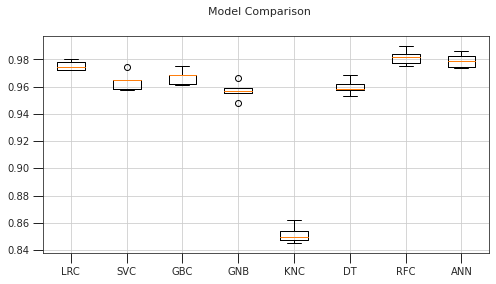

In [42]:
# Boxplot of the mean results of each supervised model for comparison 
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']
fig = plt.figure(figsize=(8,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.savefig('BoxPlot_Curves.png')
plt.show()

In [43]:
auc1

0.9998165810711666

In [44]:
auc2

0.9840425531914894

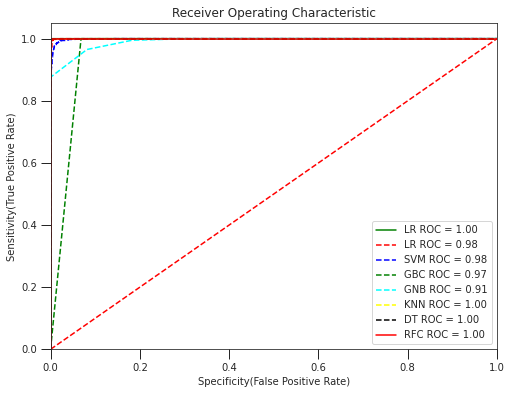

In [45]:
# Now, plot the computed values
fig = plt.figure(figsize=(8,6))

plt.plot(fpr1, tpr1, linestyle='-',color='green', label='LR ROC = %.2f' %auc1)
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='LR ROC = %.2f' %auc2)
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='SVM ROC = %.2f' %auc3)
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='GBC ROC = %.2f' %auc4)
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='GNB ROC = %.2f' %auc5)
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='KNN ROC = %.2f' %auc6)
plt.plot(fpr7, tpr7, linestyle='--',color='black', label='DT ROC = %.2f' %auc7)
plt.plot(fpr8, tpr8,linestyle='-',color='red', label='RFC ROC = %.2f' %auc8)

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display

In [46]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn import metrics
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(8,6))

# # Add the models to the list that you want to view on the ROC plot
# models = [
# {
#     'label': 'Logistic Regression',
#     'model':  LogisticRegression(),
# },
# {
#     'label': 'SVM',
#     'model':  SVC(gamma='auto', probability=True),
# },
# {
#     'label': 'Gradient Boosting',
#     'model':  GradientBoostingClassifier(),
# },
# {
#     'label': 'GaussianNB',
#     'model':  GaussianNB(),
# },
# {
#     'label': 'KNeighborsClassifier',
#     'model':  KNeighborsClassifier(),
# },
# {
#     'label': 'DecisionTreeClassifier',
#     'model':  tree.DecisionTreeClassifier(),
# },
# {
#     'label': 'RandomForestClassifier',
#     'model':  RandomForestClassifier(),
# },
# {
#     'label': 'MLPClassifier',
#     'model':  MLPClassifier(solver='adam', max_iter= 2000, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
# }
# ]

# # Below for loop iterates through your models list
# for m in models:
#     model = m['model'] # select the model
#     model.fit(x_train, y_train) # train the model
#     y_pred=model.predict(x_test) # predict the test data

# # Compute False postive rate, and True positive rate
#     fpr, tpr, thresholds = metrics.roc_curve(y_train, model.predict_proba(x_train)[:,1])

# # Calculate Area under the curve to display on the plot
#     auc = metrics.roc_auc_score(y_train,model.predict(x_train))
    
# # Now, plot the computed values
#     plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# # Custom settings for the plot 
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Specificity(False Positive Rate)')
# plt.ylabel('Sensitivity(True Positive Rate)')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.savefig('ROC_Curves.png')
# plt.show()   # Display
